<a href="https://colab.research.google.com/github/MSyahmiAzri/OWTSResultML/blob/main/Classification_1_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Replace the file ID with your own
file_id = '1fFe63sxH6kGwHdHwjweC5oUe-lv0lq6y'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_excel(link)




In [3]:
df.head()

,BIL,STATION,TEST DATE,SOURCE\nPMU/PPU/SSU,FEEDER NO,TEST FROM,CABLE ID,TEST TO,CABLE TYPE,SIZE (mm2),...,CAT1,CAT2,CAT3,CAT4,CAT5,CATEGORY DEFECT,PD TYPE,RECOMMENDATION,RECOMMENDATION (FREE TEXT),MONITORING DURATION
0,704,BANGI,2022-01-05,KJGU,6,PE TMN MEWAH INDAH,B03423,PE NG TRADING,XLPE,240MMP,...,MONITORING,MONITORING,UNHEALTHY,NORMAL,NORMAL,JOINT,CONCENTRATION,MONITORING & RETEST,RETEST OWTS,6 BULAN
1,705,BANGI,2022-01-24,SEC9,2,PE BANDAR BARU BANGI 18,B06023,PE RAWATAN SISA AIR SEKSYEN 9,MIXED,240MMP/300MMP,...,NORMAL,NORMAL,HEALTHY,NORMAL,NORMAL,NO DEFECT,SCATTERED,VLF/MWT,VLF/ MWT,6 BULAN
2,706,BANGI,2022-01-24,ABBA,4,PE SG MERAB 3,B03804,PE JALAN PBP 4 PRECINT 17,XLPE,240MMP,...,MWT,REPAIR,UNHEALTHY,NORMAL,REPAIR,NO DEFECT,SCATTERED,MONITORING & RETEST,RETEST OWTS,12 BULAN
3,707,BANGI,2022-01-25,BRNG,2,PE TASEK KESUMA FASA 3B,B05132,PE TREATMENT PLANT,MIXED,240MMP/300MMP,...,MWT,REPAIR,UNHEALTHY,NORMAL,REPAIR,NO DEFECT,NO PD,MONITORING & RETEST,RETEST OWTS,12 BULAN
4,708,BANGI,2022-01-26,UPM,3,PE APARTMENT KANTAN COURT B2,B07766,PE KG AMAN,XLPE,240MMP,...,MONITORING,MONITORING,UNHEALTHY,NORMAL,NORMAL,JOINT,CONCENTRATION,MONITORING & RETEST,RETEST OWTS,6 BULAN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   BIL                         3887 non-null   object        
 1   STATION                     3890 non-null   object        
 2   TEST DATE                   3890 non-null   datetime64[ns]
 3   SOURCE
PMU/PPU/SSU          3889 non-null   object        
 4   FEEDER NO                   3890 non-null   object        
 5   TEST FROM                   3890 non-null   object        
 6   CABLE ID                    3890 non-null   object        
 7   TEST TO                     3890 non-null   object        
 8   CABLE TYPE                  3890 non-null   object        
 9   SIZE (mm2)                  3890 non-null   object        
 10  CORE                        3890 non-null   object        
 11  LENGTH(m)                   3890 non-null   int64       

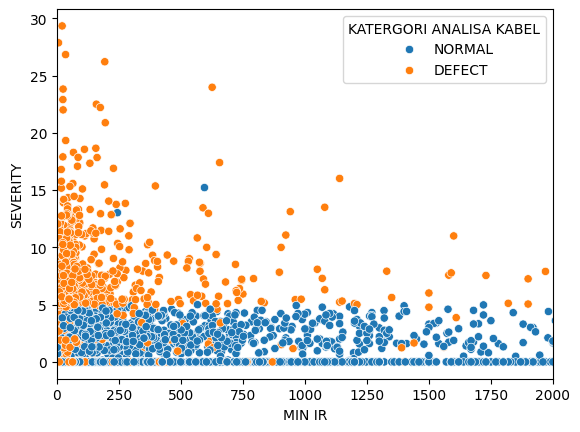

In [5]:
sns.scatterplot(x='MIN IR', y='SEVERITY', hue='KATERGORI ANALISA KABEL', data=df)
plt.xlim([0, 2000])
#plt.ylim([0,50000])
plt.show()

In [7]:
pivot_table = df.pivot_table(index=['ANALISA IR & PIDAR'], columns=['KATERGORI ANALISA KABEL'], aggfunc='size', fill_value=0)
print(pivot_table)


KATERGORI ANALISA KABEL  DEFECT  NORMAL
ANALISA IR & PIDAR                     
DAR<1                        37     226
DAR<1,IR<100                 97      59
DAR<1,IR<100,UNBALANCED     212      75
DAR<1,UNBALANCED             54     238
IR<100                      390     248
IR<100,UNBALANCED           425     136
OK                          167     921
UNBALANCED                  100     505


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame
features = df[['MIN IR','LENGTH(m)','% UNBALANCED','MIN DAR']]
target = df['KATERGORI ANALISA KABEL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Standardize the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Create a Random Forest classifier
model = RandomForestClassifier()
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print(cr)

Accuracy: 0.7853470437017995
Confusion Matrix:
[[208  97]
 [ 70 403]]
              precision    recall  f1-score   support

      DEFECT       0.75      0.68      0.71       305
      NORMAL       0.81      0.85      0.83       473

    accuracy                           0.79       778
   macro avg       0.78      0.77      0.77       778
weighted avg       0.78      0.79      0.78       778



In [15]:
# prompt: Generate a machine learning model to predict 'NEW CATEGORY' using columns of 'MIN IR', 'LENGTH(m)' and '% UNBALANCED' by using catboost classifier

!pip install CatBoost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Replace the file ID with your own
file_id = '1fFe63sxH6kGwHdHwjweC5oUe-lv0lq6y'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_excel(link)

# Prepare the data
features = ['MIN IR', 'LENGTH(m)','% UNBALANCED','MIN DAR']
target = 'KATERGORI ANALISA KABEL'

# Handle missing values (replace with the appropriate strategy for your data)
for col in features:
    if df[col].isnull().any():
      df[col] = df[col].fillna(df[col].mean()) #Example using mean, consider other methods as needed

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often beneficial for CatBoost)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize and train the CatBoost classifier
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass') # Adjust hyperparameters
model.fit(X_train, y_train, verbose=10)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print(cr)

0:	learn: 0.6587174	total: 4.6ms	remaining: 456ms
10:	learn: 0.5095964	total: 46.1ms	remaining: 373ms
20:	learn: 0.4741860	total: 74.5ms	remaining: 280ms
30:	learn: 0.4613536	total: 101ms	remaining: 225ms
40:	learn: 0.4550673	total: 129ms	remaining: 185ms
50:	learn: 0.4493752	total: 156ms	remaining: 150ms
60:	learn: 0.4444135	total: 184ms	remaining: 118ms
70:	learn: 0.4396578	total: 213ms	remaining: 87.1ms
80:	learn: 0.4347186	total: 241ms	remaining: 56.6ms
90:	learn: 0.4305797	total: 267ms	remaining: 26.4ms
99:	learn: 0.4268220	total: 291ms	remaining: 0us
Accuracy: 0.7712082262210797
Confusion Matrix:
[[210  94]
 [ 84 390]]
              precision    recall  f1-score   support

      DEFECT       0.71      0.69      0.70       304
      NORMAL       0.81      0.82      0.81       474

    accuracy                           0.77       778
   macro avg       0.76      0.76      0.76       778
weighted avg       0.77      0.77      0.77       778



In [20]:
# Assuming 'new_df' is your new DataFrame with the same structure as 'df'

file_id_new = '1EgsiIstrR0Z1tk9WazQ6gj7NVr6XVe6A'
link_new = f'https://drive.google.com/uc?id={file_id_new}'
new_df = pd.read_excel(link_new)

#from sklearn.preprocessing import LabelEncoder , OneHotEncoder
#labelencoder_x=LabelEncoder()
#new_df['KATERGORI ANALISA KABEL']=labelencoder_x.fit_transform(new_df['KATERGORI ANALISA KABEL'])
new_features = new_df[['MIN IR','LENGTH(m)','% UNBALANCED','MIN DAR']]
new_target = new_df['KATERGORI ANALISA KABEL']

# Make predictions on the new dataset using the trained model
new_y_pred = model.predict(new_features)


# Evaluate the model on the new dataset
new_accuracy = accuracy_score(new_target, new_y_pred)
print("Accuracy on new dataset:", new_accuracy)

# Generate the confusion matrix for the new dataset
new_cm = confusion_matrix(new_target, new_y_pred)

# Print the confusion matrix for the new dataset
print("Confusion Matrix on new dataset:")
print(new_cm)

new_cr = classification_report(new_target, new_y_pred)
print(new_cr)

Accuracy on new dataset: 0.7194950911640954
Confusion Matrix on new dataset:
[[208 100]
 [100 305]]
              precision    recall  f1-score   support

      DEFECT       0.68      0.68      0.68       308
      NORMAL       0.75      0.75      0.75       405

    accuracy                           0.72       713
   macro avg       0.71      0.71      0.71       713
weighted avg       0.72      0.72      0.72       713



In [21]:
result_df = pd.DataFrame({
    'STATION': new_df['STATION'],
    'LINK NO' : new_df['CABLE ID'],
    '% UNBALANCED': new_df['% UNBALANCED'],
    'ANALISA PIDAR': new_df['ANALISA IR & PIDAR'],
    'MIN IR': new_df['MIN IR'],
    'LENGTH(m)': new_df['LENGTH(m)'],
    'RL': new_df['RL'],
    'MIN DAR': new_df['MIN DAR'],
    'SEVERITY': new_df['SEVERITY'],
    'CAT1': new_df['CAT1'],
    'Actual Kategori': new_target,
    'Predicted Kategori': new_y_pred
})

result_df

,STATION,LINK NO,% UNBALANCED,ANALISA PIDAR,MIN IR,LENGTH(m),RL,MIN DAR,SEVERITY,CAT1,Actual Kategori,Predicted Kategori
0,KLANG,K20324,0.310493,IR<100,32.2,3220,103.6840,1.09,5.108,REPAIR,DEFECT,DEFECT
1,KLANG,K24478,0.919641,"DAR<1,UNBALANCED",626.0,1608,1006.6080,0.91,0.7112,MWT,NORMAL,NORMAL
2,KLANG,K24765,0.417722,DAR<1,552.0,364,200.9280,0.94,0,MWT,NORMAL,NORMAL
3,KLANG,K14103,0.668750,UNBALANCED,1060.0,280,296.8000,1.01,3.9745,MONITORING,NORMAL,NORMAL
4,KLANG,K14104,0.462451,OK,4080.0,416,1697.2800,1.04,0,MWT,NORMAL,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...
708,PUCHONG,J11012,0.623762,UNBALANCED,1140.0,633,721.6200,1.02,3.4,MONITORING,NORMAL,NORMAL
709,PUCHONG,J50915,0.406294,OK,8490.0,2793,23712.5700,1.03,2.3,MONITORING,NORMAL,NORMAL
710,PUCHONG,J49125,0.263846,DAR<1,9570.0,327,3129.3900,0.94,2.3,MONITORING,NORMAL,NORMAL
711,PUCHONG,J40014,0.638554,"DAR<1,UNBALANCED",1500.0,674,1011.0000,0.89,1.2,MWT,NORMAL,NORMAL
